# import neccesary packages

In [1]:
import pickle
from statistics import mean
import matplotlib.pyplot as plt
import os

In [2]:
file_names = ['result_POP.pickle','result_MPC.pickle','result_LCE.pickle','result_LCD.pickle']

In [3]:
os.getcwd()

'/Users/sijiazhang/jupyter_notebook/socialccnsim'

# 😯 Load variables

In [9]:
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
if not os.path.exists('zipf'):
    os.mkdir('zipf')
os.chdir('zipf')
result = {}
for file_name in file_names:
    f = open(file_name, 'rb')
    result[file_name] = pickle.load(f)
    f.close()
os.chdir('..')
os.chdir('..')

# Let's see the result of 

In [5]:
result

{'result_POP.pickle': {0.2: [429, 433, 437, 477, 493, 500, 478, 487, 534, 515],
  0.4: [455, 521, 527, 623, 641, 653, 651, 651, 661, 658],
  0.6: [610, 675, 665, 796, 852, 861, 910, 875, 914, 908],
  0.8: [896, 884, 941, 1107, 1103, 1147, 1182, 1192, 1158, 1159],
  1.0: [1155, 1224, 1242, 1414, 1417, 1411, 1440, 1449, 1428, 1481],
  1.2: [1478, 1515, 1517, 1643, 1667, 1631, 1652, 1669, 1661, 1677]},
 'result_MPC.pickle': {0.2: [19, 26, 18, 25, 17, 14, 23, 21, 20, 24],
  0.4: [33, 56, 47, 44, 42, 47, 57, 60, 46, 77],
  0.6: [69, 155, 153, 167, 191, 228, 217, 216, 223, 217],
  0.8: [194, 298, 359, 392, 389, 396, 367, 394, 401, 414],
  1.0: [514, 663, 689, 715, 664, 689, 664, 681, 638, 640],
  1.2: [789, 920, 961, 982, 984, 986, 999, 983, 1006, 999]},
 'result_LCE.pickle': {0.2: [54, 40, 39, 48, 40, 64, 61, 44, 47, 50],
  0.4: [57, 62, 52, 58, 53, 62, 59, 66, 47, 77],
  0.6: [103, 90, 101, 113, 109, 109, 101, 96, 110, 111],
  0.8: [240, 221, 220, 224, 233, 219, 223, 221, 250, 263],
  1.0:

#  😯 Save variables

In [6]:
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
if not os.path.exists('zipf'):
    os.mkdir('zipf')
os.chdir('zipf')
for filename in file_names:
    f = open(filename, 'wb')
    pickle.dump(result[filename],f)
    f.close()
os.chdir('..')
os.chdir('..')

# 😋 visualize

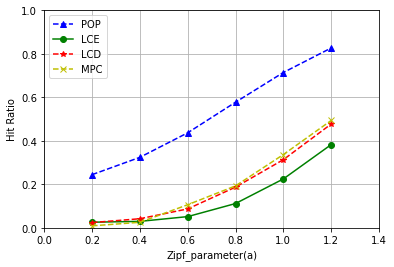

In [10]:
plt.plot(list(result['result_POP.pickle'].keys()),list(float(mean(result['result_POP.pickle'][k][4:8])/2000) for k in result['result_POP.pickle'].keys()),'b--^')
plt.plot(list(result['result_LCE.pickle'].keys()),list(float(mean(result['result_LCE.pickle'][k][4:8])/2000) for k in result['result_LCE.pickle'].keys()),'g-o')
plt.plot(list(result['result_LCD.pickle'].keys()),list(float(mean(result['result_LCD.pickle'][k][4:8])/2000) for k in result['result_LCD.pickle'].keys()),'r--*')
plt.plot(list(result['result_MPC.pickle'].keys()),list(float(mean(result['result_MPC.pickle'][k][4:8])/2000) for k in result['result_MPC.pickle'].keys()),'y--x')
plt.legend(['POP','LCE','LCD','MPC'])
plt.axis([0,1.4,0,1])
plt.xlabel('Zipf_parameter(a)')
plt.ylabel('Hit Ratio')
plt.grid()

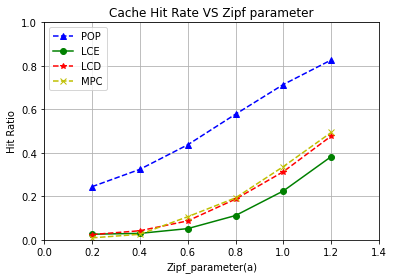

In [13]:
plt.plot(list(result['result_POP.pickle'].keys()),list(float(mean(result['result_POP.pickle'][k][4:8])/2000) for k in result['result_POP.pickle'].keys()),'b--^')
plt.plot(list(result['result_LCE.pickle'].keys()),list(float(mean(result['result_LCE.pickle'][k][4:8])/2000) for k in result['result_LCE.pickle'].keys()),'g-o')
plt.plot(list(result['result_LCD.pickle'].keys()),list(float(mean(result['result_LCD.pickle'][k][4:8])/2000) for k in result['result_LCD.pickle'].keys()),'r--*')
plt.plot(list(result['result_MPC.pickle'].keys()),list(float(mean(result['result_MPC.pickle'][k][4:8])/2000) for k in result['result_MPC.pickle'].keys()),'y--x')
plt.legend(['POP','LCE','LCD','MPC'])
plt.axis([0,1.4,0,1])
plt.xlabel('Zipf_parameter(a)')
plt.ylabel('Hit Ratio')
plt.title('Cache Hit Rate VS Zipf parameter')
plt.grid()
if not os.path.exists('result/'):
    os.mkdir('result/')
os.chdir('result')
plt.savefig('zipf_VS_Hit_Ratio.png')
os.chdir('../')

# Others

In [ ]:
temp = result['result_LCD.pickle']

In [57]:
result['result_LCD.pickle'] = {}
result['result_LCD.pickle'][5] = temp[5]
result['result_LCD.pickle'][10] = temp[10]
result['result_LCD.pickle'][15] = temp[15]
result['result_LCD.pickle'][20] = temp[20]
result['result_LCD.pickle'][25] = temp[25]
result['result_LCD.pickle'][20] = temp[30]
result['result_LCD.pickle'][35] = temp[35]

## Analyze with Seaborn

In [14]:
import seaborn as sns
import pandas as pd

In [15]:
df = pd.DataFrame(columns = ['method','Zipf patameter(a)' ,'Hit Ratio'])
for method in result.keys():
    for r in result[method].keys():
        #print({'method':method, 'Cache Capacity':r, 'Average Internal Traffic(requests)': mean(result[method][r][4:8])})
        df = df.append({'method':method,'Zipf patameter(a)':r ,'Hit Ratio':mean(result[method][r][4:8])/2000},ignore_index=True)

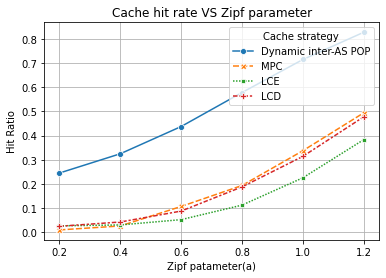

In [18]:
sns.lineplot(x = 'Zipf patameter(a)', y = 'Hit Ratio', hue = 'method',style="method", markers = True, data = df)
plt.legend(title='Cache strategy', loc='upper right', labels=['Dynamic inter-AS POP', 'MPC', 'LCE', 'LCD'])
#plt.axis([0,40,0,6])
plt.grid()
plt.title('Cache hit rate VS Zipf parameter')
#sns.lineplot(x = 'Cache Capacity', y = 'Average Internal Traffic(requests)', hue = 'method', data = df)
#plt.axis([0,40,0,2000])
## 保存图片
if not os.path.exists('result/'):
    os.mkdir('result/')
os.chdir('result')
plt.savefig('Hit_Ratio_zipf.png')
os.chdir('../')

In [17]:
result_file = 'result_hit_zipf.pickle'
if not os.path.exists('result'):
    os.mkdir('result')
os.chdir('result/')
f = open(result_file, 'wb')
pickle.dump(df,f)
f.close()
os.chdir('..')